In [65]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [66]:
df = pd.read_csv(r"D:\ml deployment\classification-demo\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [67]:
X = df.drop("Outcome" , axis=1)
y=df["Outcome"]

In [68]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2 , random_state=1)

In [69]:
features_to_scale = ["Pregnancies",	"Glucose" , "BloodPressure","SkinThickness"	,"Insulin"	,"BMI",	"DiabetesPedigreeFunction",	"Age"]

In [70]:
scalar = StandardScaler()
scalar.fit(X_train[features_to_scale])

StandardScaler()

In [71]:
X_train[features_to_scale] = scalar.transform(X_train[features_to_scale])
X_test[features_to_scale] = scalar.transform(X_test[features_to_scale])

In [72]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [73]:
y_test_pred = model.predict(X_test)
print(y_test_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0
 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0]


In [74]:
comparison = pd.DataFrame({'Actual':y_test , "Predicted":y_test_pred})
print(comparison[0:15])
print(comparison[100:])

     Actual  Predicted
285       0          0
101       0          0
581       0          0
352       0          0
726       0          0
472       0          0
233       0          0
385       0          0
556       0          0
59        0          0
756       0          0
341       0          0
445       1          1
614       1          1
371       0          0
     Actual  Predicted
262       0          0
707       0          0
207       1          1
507       0          0
527       0          0
463       0          0
61        1          1
148       0          1
255       1          0
452       0          0
646       1          0
3         0          0
201       0          0
411       0          0
502       1          0
268       0          0
65        0          0
722       1          0
538       0          0
755       1          0
104       0          0
339       1          1
701       1          0
57        0          0
307       0          0
705       0          0
265       0

In [75]:
accuracy=accuracy_score(y_test,y_test_pred)
confusion_matrix =  confusion_matrix(y_test,y_test_pred)
classification_report = classification_report(y_test,y_test_pred)

In [76]:
print(f"Accuracy :\n {accuracy:.4f}")  
print("Confusion Matrix :\n" , confusion_matrix)  
print("Classification Report :\n" , classification_report)  

Accuracy :
 0.7792
Confusion Matrix :
 [[89 10]
 [24 31]]
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



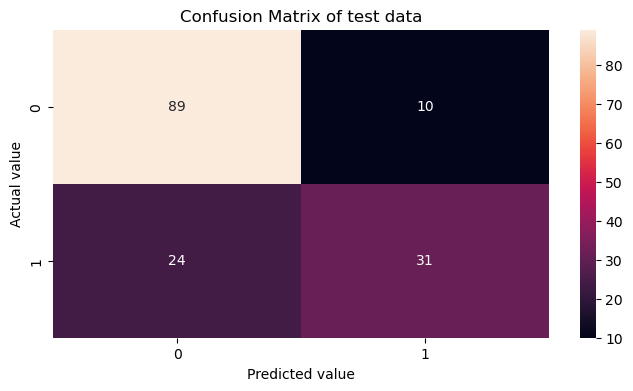

In [77]:
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix,annot=True ,fmt='d')
plt.title("Confusion Matrix of test data")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.show()

In [78]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]

In [79]:
recall = TP/(TP+FN)
precision = TP/(TP+FP)
specificity = TN/(TN+FP)
accuracy = (TP+TN)/(TP+FP+FN+TN)
f1_score = 2*(recall*precision)/(recall+precision)

In [80]:
print(f"Recall : {recall:.4f}")
print(f"Precision : {precision:.4f}")
print(f"F1 Score : {f1_score:.4f}")
print(f"Specificity : {specificity:.4f}")
print(f"Accuracy : {accuracy:.4f}")

Recall : 0.5636
Precision : 0.7561
F1 Score : 0.6458
Specificity : 0.8990
Accuracy : 0.7792


In [81]:
print("*** Making predictions for new data ***")
new_data = np.array([
    [9,160,70,20,80,28,0.5,34],
    [0,104,70,15,0,21,0.1,29],
    [2,158,90,0,0,31.6,1.072,66],
    [1,100,66,15,56,23.6,0.666,26]
])

*** Making predictions for new data ***


In [82]:
new_data_df = pd.DataFrame(data=new_data , columns= X_train.columns)

In [83]:
new_data_df= new_data_df.fillna(0)
new_data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,9.0,160.0,70.0,20.0,80.0,28.0,0.500,34.0
1,0.0,104.0,70.0,15.0,0.0,21.0,0.100,29.0
2,2.0,158.0,90.0,0.0,0.0,31.6,1.072,66.0
3,1.0,100.0,66.0,15.0,56.0,23.6,0.666,26.0


In [84]:
new_data_scaled = scalar.transform(new_data_df)
new_data_scaled

array([[ 1.51659096,  1.22468484,  0.05772256,  0.01130532,  0.0082768 ,
        -0.50265921,  0.11068714,  0.0594845 ],
       [-1.14225474, -0.54551709,  0.05772256, -0.30421584, -0.67847404,
        -1.42077969, -1.11219917, -0.36422177],
       [-0.55140014,  1.16146334,  1.07178992, -1.25077932, -0.67847404,
        -0.03048297,  1.85941457,  2.77120462],
       [-0.84682744, -0.67196009, -0.14509091, -0.30421584, -0.19774845,
        -1.07976351,  0.61818496, -0.61844554]])

In [85]:
column_names = ["Pregnancies",	"Glucose" , "BloodPressure","SkinThickness"	,"Insulin"	,"BMI",	"DiabetesPedigreeFunction",	"Age"]

In [86]:
predict_df = pd.DataFrame(new_data_scaled , columns=column_names)
predict_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.516591,1.224685,0.057723,0.011305,0.008277,-0.502659,0.110687,0.059484
1,-1.142255,-0.545517,0.057723,-0.304216,-0.678474,-1.420780,-1.112199,-0.364222
2,-0.551400,1.161463,1.071790,-1.250779,-0.678474,-0.030483,1.859415,2.771205
3,-0.846827,-0.671960,-0.145091,-0.304216,-0.197748,-1.079764,0.618185,-0.618446


In [87]:
prediction = model.predict(predict_df)
prediction

array([1, 0, 1, 0], dtype=int64)

In [88]:
import joblib
joblib.dump(model , r'D:\ml deployment\classification-demo\final_diabetes_model.pkl')
joblib.dump(list(X.columns) , r'D:\ml deployment\classification-demo\diabetes_column_names.pkl')

['D:\\ml deployment\\classification-demo\\diabetes_column_names.pkl']

In [89]:
col_names = joblib.load('diabetes_column_names.pkl')
loaded_model = joblib.load('final_diabetes_model.pkl')

In [90]:
new_data = np.array([
    [12,200,99,18,90,30,0.7,44],
    [0,82,71,16,0,19,0.1,27]
])

In [91]:
new_data_df = pd.DataFrame(data=new_data , columns= X_train.columns)
new_data_df= new_data_df.fillna(0)
new_data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,12.0,200.0,99.0,18.0,90.0,30.0,0.7,44.0
1,0.0,82.0,71.0,16.0,0.0,19.0,0.1,27.0


In [92]:
new_data_scaled = scalar.transform(new_data_df)
new_data_scaled

array([[ 2.40287287,  2.48911479,  1.52812023, -0.11490315,  0.09412066,
        -0.24033908,  0.7221303 ,  0.90689704],
       [-1.14225474, -1.24095356,  0.10842593, -0.24111161, -0.67847404,
        -1.68309982, -1.11219917, -0.53370428]])

In [93]:
predict_df = pd.DataFrame(new_data_scaled , columns=col_names)
predict_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.402873,2.489115,1.528120,-0.114903,0.094121,-0.240339,0.722130,0.906897
1,-1.142255,-1.240954,0.108426,-0.241112,-0.678474,-1.683100,-1.112199,-0.533704


In [94]:
prediction = loaded_model.predict(predict_df)
prediction

array([1, 0], dtype=int64)